# Project 2: PCA to discover microbial metabolic strategies in the ocean
The goal of this project is to recapitulate an analysis from the paper of Gralka et al. that uses PCA to discover patterns in the carbon catabolic capabilities of marine microbial communities.   (64 pts total)

* The paper is on canvas (lecture 8) and here: https://www.nature.com/articles/s41564-023-01458-z
* As discussed in lecture 9 the authors measure growth rates of $>$100 diverse marine microbial strains on $>$100 different carbon sources using high throughput assays.
* The resulting dataset is a matrix that is approximately 100 by 100 (strains x growth rates)
* The columns are labeled by the carbon sources used and the rows by ID numbers for each strain

## Step 1: (4pts) load the data. 

From the GralkaRawData.xlsx you will have to load SI Table 3 as a dataframe.  Take care of processing the header to this file as you will want the column names to include the carbon source names.  So look carefully at the file first and be sure you get the data loaded correctly.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [125]:
df = pd.read_excel('GralkaRawData.xlsx', sheet_name='SI Table 3', header = 6)

df_raw = pd.read_excel('GralkaRawData.xlsx', sheet_name='SI Table 3', header = 6)
print(df)

df_raw.drop('mb', axis = 1, inplace=True)


    strain ID   kingdom          phylum                class            order  \
0       12B01  Bacteria  Proteobacteria  Gammaproteobacteria      Vibrionales   
1       13B01  Bacteria  Proteobacteria  Gammaproteobacteria      Vibrionales   
2        1A01  Bacteria  Proteobacteria  Gammaproteobacteria      Vibrionales   
3        1A06  Bacteria  Proteobacteria  Gammaproteobacteria      Vibrionales   
4        3B05  Bacteria  Proteobacteria  Gammaproteobacteria  Pseudomonadales   
..        ...       ...             ...                  ...              ...   
171     I2R16  Bacteria  Proteobacteria  Gammaproteobacteria  Alteromonadales   
172     I3M07  Bacteria  Proteobacteria  Gammaproteobacteria      Vibrionales   
173     I3M17  Bacteria    Bacteroidota          Bacteroidia     Cytophagales   
174     I3R07  Bacteria  Proteobacteria  Gammaproteobacteria  Pseudomonadales   
175       YB2  Bacteria  Proteobacteria  Gammaproteobacteria      Vibrionales   

                family     

## Step 2: Extracting the growth rate matrix and characterization
Question 2.1 (2 pts) Compute the fraction of strains that grow on each of the carbon sources tested, which is most commonly utilized and which least commonly utilized?  Note that `mb' is listed as a resource but refers to "marine broth" which is a chemically undefined medium and should be ignored.  Might be useful to create a dataframe that includes only columns of the original dataframe that describe growth and not the taxonomy etc.

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
171    0.0
172    0.0
173    0.0
174    0.0
175    0.0
Name: methyl benzoate, Length: 176, dtype: float64
     gluconate  galacturonate  gluconate lactone  glucuronate lactone  \
0     4.284763       0.000000           7.467442             0.000000   
1     4.779399       0.000000           5.874979             0.000000   
2     8.945088       0.000000          14.988878            14.978233   
3     0.000000       0.000000           0.000000             0.000000   
4     5.254451       2.930394          14.061493             7.989875   
..         ...            ...                ...                  ...   
171   0.000000       0.000000           0.000000             2.973870   
172   5.907038       0.000000          14.958417             0.000000   
173   0.000000       0.000000           0.000000             0.000000   
174   0.000000       0.000000           0.000000             0.000000   
175   4.664913       0.00

,strain ID,kingdom,phylum,class,order,family,genus,species,"sugar-acid-preference (averaged over 3 experiments, -1=acids, +1=sugars)",genome %GC,...,sorbitol,starch,thymidine,thymine,ulvan,uracil,uridine,xylan,xylitol,xyloglucan
0,12B01,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,Vibrio splendidus,0.387115,45.134365,...,0.0,2.986775,1.751500,0.0,0.000000,0.0,3.996350,0.0,0.000000,0.0
1,13B01,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,Vibrio splendidus,-0.262048,45.231178,...,0.0,2.267510,1.459929,0.0,0.000000,0.0,14.971317,0.0,0.000000,0.0
2,1A01,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,Vibrio lentus,0.235795,45.139398,...,0.0,3.648574,0.856679,0.0,0.000000,0.0,3.428649,0.0,0.000000,0.0
3,1A06,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,Vibrio breoganii,0.853738,46.428602,...,0.0,1.769360,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,3B05,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Nitrincolaceae,Neptunomonas,Neptunomonas phycophila,-0.511795,46.004129,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.138197,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,I2R16,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Alteromonadaceae,Psychrosphaera,NaN,-0.019734,40.867696,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
172,I3M07,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrio,Vibrio cyclitrophicus,0.301999,44.755719,...,0.0,2.250446,0.000000,0.0,3.207585,0.0,0.000000,0.0,0.000000,0.0
173,I3M17,Bacteria,Bacteroidota,Bacteroidia,Cytophagales,Cyclobacteriaceae,Cyclobacterium,NaN,0.913059,39.516564,...,0.0,0.000000,0.000000,0.0,2.940937,0.0,0.000000,0.0,0.000000,0.0
174,I3R07,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Nitrincolaceae,Amphritea,NaN,-0.487280,48.590526,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0


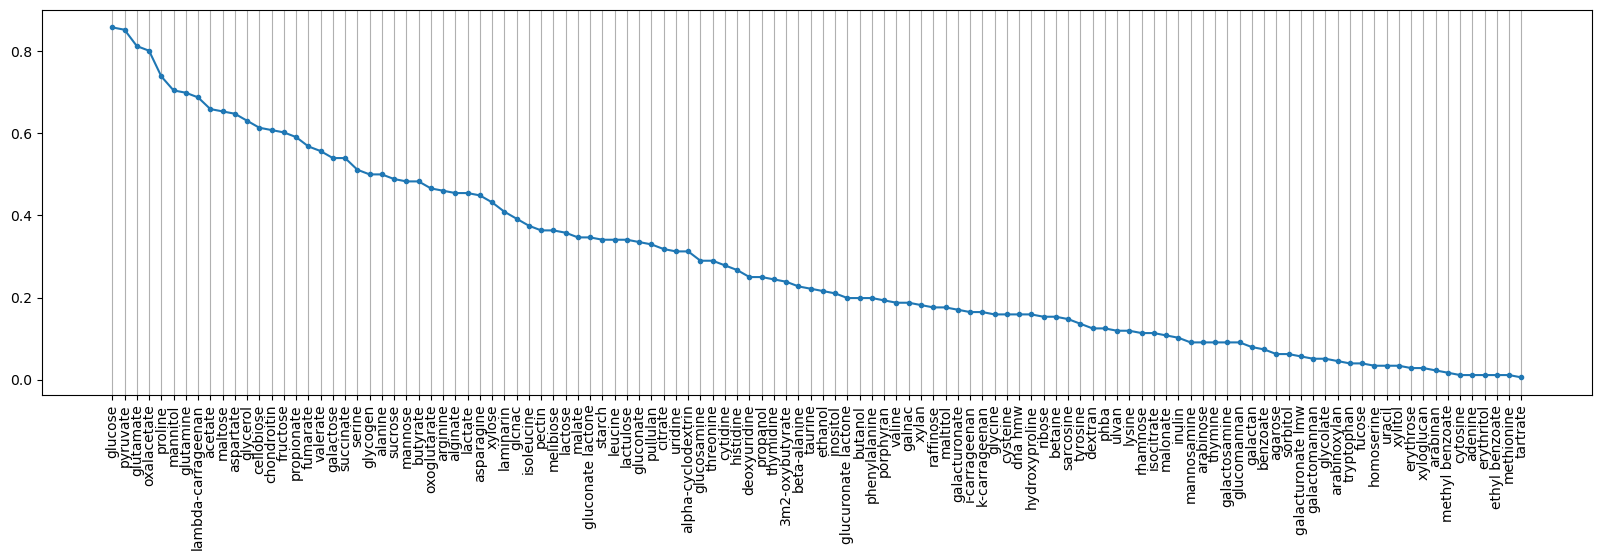

In [126]:
np_df = np.array(df)
growth_df = df.iloc[:,11:176]
growth_df.drop('mb', axis = 1, inplace=True)

# mb_index = growth_df.columns.get_loc('mb')
# print(mb_index)
print(growth_df.iloc[:,100])

print(growth_df)

def frac(col):
    nonzeros = col.astype(bool).sum(axis=0)
    return nonzeros / len(col)

print(frac(growth_df.iloc[:,0]))
counted_growth = growth_df.apply(frac)
sorted_growth = counted_growth.sort_values(ascending=False)
plt.figure(figsize=(20, 5))
plt.plot(sorted_growth, marker = '.')
plt.xticks(rotation=90);
plt.grid(axis="x")

df

In [76]:
import seaborn

Question 2.2: (2 pts) Figure out which columns in the dataframe you created above have the growth rate data in them.  you want to construct a data matrix X, that has as rows the strains and as columns carbon sources on which each strain was grown. plot the matrix as a heatmap.

     glucuronate  gluconate  galacturonate  gluconate lactone  \
0        0.00000   4.284763       0.000000           7.467442   
1        0.00000   4.779399       0.000000           5.874979   
2        0.00000   8.945088       0.000000          14.988878   
3        0.00000   0.000000       0.000000           0.000000   
4        3.14315   5.254451       2.930394          14.061493   
..           ...        ...            ...                ...   
171      0.00000   0.000000       0.000000           0.000000   
172      0.00000   5.907038       0.000000          14.958417   
173      0.00000   0.000000       0.000000           0.000000   
174      0.00000   0.000000       0.000000           0.000000   
175      0.00000   4.664913       0.000000           6.244412   

     glucuronate lactone  glucosamine    glcnac  mannosamine  galnac  \
0               0.000000     4.723077  3.096046          0.0     0.0   
1               0.000000     4.816162  2.735344          0.0     0.0   
2  

<Axes: >

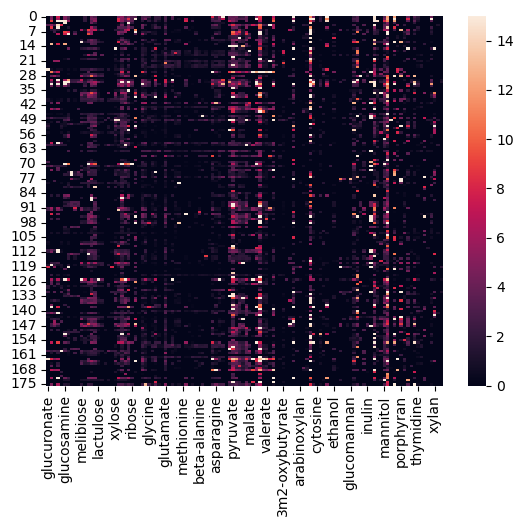

In [127]:
matrixX = df
matrixX.drop(['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species','sugar-acid-preference (averaged over 3 experiments, -1=acids, +1=sugars)','genome %GC'], axis = 1, inplace=True)
matrixX
matrixX.set_index('strain ID')
matrixX.iloc[0,0]
print(matrixX.iloc[0:,1:])
# strainIDs = matrix.iloc[:,0]
seaborn.heatmap(matrixX.iloc[0:,1:])

In [12]:
print(df.columns.values)

['strain ID' 'glucuronate' 'gluconate' 'galacturonate' 'gluconate lactone'
 'glucuronate lactone' 'glucosamine' 'glcnac' 'mannosamine' 'galnac'
 'galactosamine' 'melibiose' 'lactose' 'sucrose' 'maltose' 'cellobiose'
 'lactulose' 'raffinose' 'fucose' 'rhamnose' 'arabinose' 'xylose'
 'mannose' 'glucose' 'galactose' 'fructose' 'ribose' 'alpha-cyclodextrin'
 'erythrose' 'proline' 'glutamine' 'glycine' 'arginine' 'aspartate'
 'cysteine' 'lysine' 'glutamate' 'sarcosine' 'histidine' 'isoleucine'
 'leucine' 'methionine' 'taurine' 'valine' 'tyrosine' 'phenylalanine'
 'beta-alanine' 'hydroxyproline' 'betaine' 'tryptophan' 'alanine'
 'asparagine' 'serine' 'threonine' 'homoserine' 'lactate' 'pyruvate'
 'fumarate' 'acetate' 'propionate' 'succinate' 'malate' 'isocitrate'
 'citrate' 'oxalacetate' 'butyrate' 'valerate' 'malonate' 'oxoglutarate'
 'tartrate' 'glycolate' '3m2-oxybutyrate' 'adenine' 'agarose' 'alginate'
 'arabinan' 'arabinoxylan' 'benzoate' 'butanol' 'chondroitin' 'cytidine'
 'cytosine' '

## Step 3: explore correlations in the dataset before doing PCA.
Let's start by exploring correlations in the dataset.  The goal is to get some idea of whether growing fast on one carbon source makes it likely to grow on another type of carbon source quickly.

Question 3.1: (4 pts) for succinate (an organic acid), compute the Pearson's correlation coefficient `np.corrcoef'between the column of X for succinate and all other carbon sources in the dataset.  Make a histogram of correlation coefficients.  The highest value will be succcinate (1) which you can ignore, but several other carbon sources will also be high.  Print out a list of the 5 most correlated carbon sources with succinate.  What type of compounds are these?  Sugars or acids?  (hint: sugars tend to end in 'ose' while acids in 'ate' or amino acids that should be familiar.  What does this mean?

The top ones tend to end in ate, so they are acids, which means that across species the uptake of acids and sugars as general groups are well correlated with each other. Species that are good at growing on one acid tend to be good at growing on the others

58
[ 0.30179571  0.08060592  0.28712933  0.06522582  0.25629461  0.15643034
 -0.04668096  0.07986468  0.06549627 -0.02397576 -0.0683284   0.07528082
  0.02194912 -0.04499091  0.05058698 -0.14410624  0.44095093 -0.00592589
  0.00138463  0.07638817  0.20460613  0.18253728  0.23827896  0.14025691
  0.16152009 -0.01749418  0.21046276  0.56244056  0.42021989  0.26524863
  0.39986503  0.24270454  0.28099024  0.21299121  0.46356251  0.26946218
  0.21044758  0.14105952  0.10727282  0.02369727  0.20095032  0.30163144
  0.29531669  0.31654099  0.1953848   0.12288728  0.21672867  0.1531654
  0.41933916  0.39164974  0.40631107  0.22523214  0.36806874  0.41019257
  0.38944158  0.70557489  0.42992563  0.20750224  1.          0.38822311
  0.35982749  0.39963739  0.47302139  0.30298246  0.35289491  0.238033
  0.45763945  0.0582158   0.39683432  0.14319648  0.26853694 -0.15097554
 -0.06798898  0.031709   -0.106591    0.10119191  0.34348567  0.0983384
  0.20673953  0.01144742  0.16157698 -0.23588553  0.

,gluconate,galacturonate,gluconate lactone,glucuronate lactone,glucosamine,glcnac,mannosamine,galnac,galactosamine,melibiose,...,sorbitol,starch,thymidine,thymine,ulvan,uracil,uridine,xylan,xylitol,xyloglucan
0,0.301796,0.080606,0.287129,0.065226,0.256295,0.15643,-0.046681,0.079865,0.065496,-0.023976,...,0.06268,-0.020794,0.23894,0.143047,-0.052013,0.260677,0.185552,-0.112905,0.421867,-0.008894


fumarate        0.705575
proline         0.562441
oxalacetate     0.473021
glutamate       0.463563
oxoglutarate    0.457639
Name: 0, dtype: float64

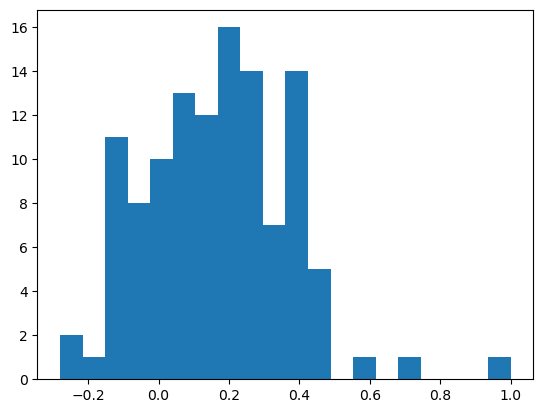

In [135]:
correlations = np.zeros(len(growth_df.columns))
print(growth_df.columns.get_loc('succinate'))

for x in range(len(growth_df.columns)):
    matrix = (np.corrcoef(growth_df.iloc[:,58], growth_df.iloc[:,x]))
    correlations[x] = matrix[1,0]
print(correlations)
plt.hist(correlations, bins = 20)

index = [0]

correlations_df = pd.DataFrame(data = np.reshape(correlations, (1,116)), columns = growth_df.columns, index = index)
# correlations.columns = [growth_df.columns]
pd.set_option('display.max_colwidth', None)
display(correlations_df)
sorted_correlations_df = correlations_df.sort_values(0, axis = 1, ascending=False)
sorted_correlations_df.iloc[0,1:6]

Question 3.2: (4 pts) for gluse (a sugar), same question as 3.1.

21
[ 2.99665941e-01  1.24965090e-01  2.72588851e-01  6.97280989e-02
  5.99807839e-01  5.02016646e-01 -2.07873045e-02  1.23771952e-01
  1.26362553e-01  2.37418938e-01  3.02507021e-01  2.76995609e-01
  5.28926860e-01  3.81052187e-01  2.99079316e-01  2.16887156e-01
 -7.95935858e-02  7.74975183e-04  2.97271732e-02  3.08791342e-02
  2.92539669e-01  1.00000000e+00  3.77541589e-01  5.37249409e-01
  5.50436876e-01  5.00315798e-02 -6.12153830e-02  3.03970661e-01
  3.35163334e-01  2.36184636e-01  1.06565239e-01  2.31229896e-01
  1.38590126e-01 -1.32223047e-01  2.28515883e-01 -7.96420037e-03
  2.73726916e-01 -9.82120597e-02 -4.55807001e-02 -4.38588208e-02
  1.69697926e-01 -7.95002156e-02  2.40457385e-02 -9.66972579e-02
  2.07563174e-02 -4.67043841e-02 -5.01211082e-02  2.11922795e-02
  3.15236438e-01  2.36456130e-01  4.38194452e-01  2.69263412e-01
 -4.61977139e-02  1.20258990e-01 -3.26969948e-02  1.60173579e-01
  1.77007584e-01  6.73120937e-02  1.82537277e-01 -2.83100104e-02
  1.85945404e-01  4.39

,gluconate,galacturonate,gluconate lactone,glucuronate lactone,glucosamine,glcnac,mannosamine,galnac,galactosamine,melibiose,...,sorbitol,starch,thymidine,thymine,ulvan,uracil,uridine,xylan,xylitol,xyloglucan
0,0.299666,0.124965,0.272589,0.069728,0.599808,0.502017,-0.020787,0.123772,0.126363,0.237419,...,0.172248,0.358817,0.383964,-0.056276,0.045382,-0.048635,0.254891,0.024394,-0.044499,0.280311


,glucose,glucosamine,ribose,fructose,maltose,glcnac,cytidine,lambda-carrageenan,deoxyuridine,citrate,...,erythritol,ethyl benzoate,valine,fucose,glycolate,phenylalanine,isoleucine,benzoate,3m2-oxybutyrate,lysine
0,1.0,0.599808,0.550437,0.537249,0.528927,0.502017,0.480381,0.450743,0.444264,0.439114,...,-0.069007,-0.07048,-0.0795,-0.079594,-0.090526,-0.096697,-0.098212,-0.118093,-0.130623,-0.132223


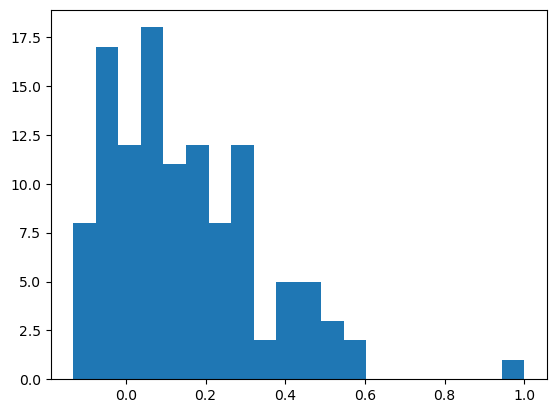

In [129]:
correlations_gluse = np.zeros(len(growth_df.columns))
print(growth_df.columns.get_loc('glucose'))

for x in range(len(growth_df.columns)):
    matrix = (np.corrcoef(growth_df.iloc[:,21], growth_df.iloc[:,x]))
    correlations_gluse[x] = matrix[1,0]
print(correlations_gluse)
plt.hist(correlations_gluse, bins = 20)

index = [0]

correlations_df_gluse = pd.DataFrame(data = np.reshape(correlations_gluse, (1,116)), columns = growth_df.columns, index = index)
# correlations.columns = [growth_df.columns]
pd.set_option('display.max_colwidth', None)
display(correlations_df_gluse)
sorted_correlations_df_gluse = correlations_df_gluse.sort_values(0, axis = 1, ascending=False)
sorted_correlations_df_gluse

Question 3.3: (4pts) Given the results from 3.1 and 3.2 what general statement might you make about growth on sugars and growth on acids?

Good growth on one sugar is associated with better growth on other sugars, and similarly good growth on one acid is associated with good growth on other acids. Growth rate on acids have low covariance with each other, and sugars have low covariance with each other as well.

## Step 4: do PCA -- is there any dimension reduction here?

Next perform PCA on the dataset. The first step is to use the built-in function `scikitlearn.decomposition.PCA' to decompose the matrix.  The number of principle components you call should be equal to the lesser of the number columns or rows of the data matrix X - 1.  So in this case the number of columns -1.  Fit this number of components when you use the sklearn PCA function  

Question 4.0: (2pts) pre-processing the data.  For each column of X compute the z-score of each entry and use this scaled version of the X matrix.  Note that you can use the `sklearn.preprocessing.StandardScalar' method to do this.

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

growth_matrix = matrixX.iloc[0:,1:]
scaler = StandardScaler()
scaler.fit(growth_matrix)
trans_df = scaler.transform(growth_matrix)

pca = PCA(n_components = 100)
pca.fit(trans_df)

PCA(n_components=100)

Question 4.1: (6 pts) make a plot of the cumulative variance explained as a function of the number of principle components included. X-axis is number of PCs, y-axis is variance explained by PCs.  So the first point will be the variance explained by PC1 and the second will be variance explained by PC1 AND PC2, and so on.  The curve will be monotonically increasing.

[0.11704212 0.08760164 0.06036247]
0.9011027456481637
49


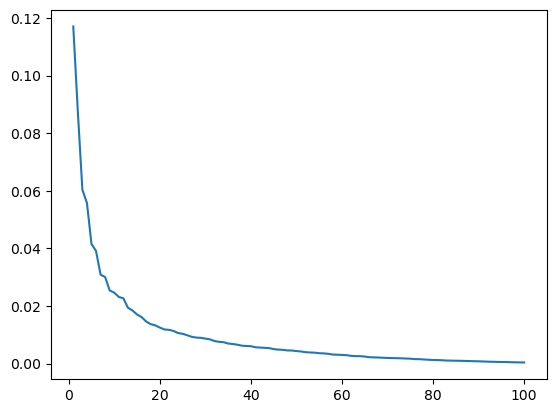

In [137]:
print(pca.explained_variance_ratio_[0:3])

plt.plot(np.arange(1,101),pca.explained_variance_ratio_)

ninety = 0
vari = 0
for x in range(100):
    if vari < 0.9:
        vari = vari + pca.explained_variance_ratio_[x]
        ninety += 1
    else:
        break

print(vari)
print(ninety)

Question 4.2: (4pts) How much variance in the dataset does the first principal component explain?  How many principal components would you have to include to explain 90% of the variance in the dataset? **Check that these numbers make sense with your plot above**.

The first PC explains 11.7% of the variance. It takes 49 PCs to explain 90% of the variance.

Question 4.3: (2pts) The amount of variance explained by the first PC should be around 11\%.  Go look at Fig. 1C in the paper, how much variance is explained by the first PC in the paper?  Are these numbers the same?  What do you think is going on?

8.2% is explained by PC1 in the paper, which is different from our numbers. This does happen to correspond to PC2, so PC1 may have been removed during some normalization process that removes a variable linked to PC1. 

Question 4.4: (4 pts) Let's try and figure out what this first PC is describing about our dataset.  For each **row** of X compute the sum of the row.  This is something like the total growth of each strain (row). Then make a scatterplot of this quantity against the projection of the data onto the first PC.  Note that the method `pca.transform(X_scaled)' projects your data onto the PCs, where X_scaled is the z-scored data matrix. So what aspect of the phenotypes of strains is the first PC describing?

It seems that the first PC is describing the total growth across all the resource types, or the sum of all the growth rates per species.

176
0      244.599706
1      294.064487
2      280.057736
3       73.395092
4      182.996770
          ...    
171     18.494198
172    189.292142
173     57.480884
174     80.771334
175    178.501189
Length: 176, dtype: float64


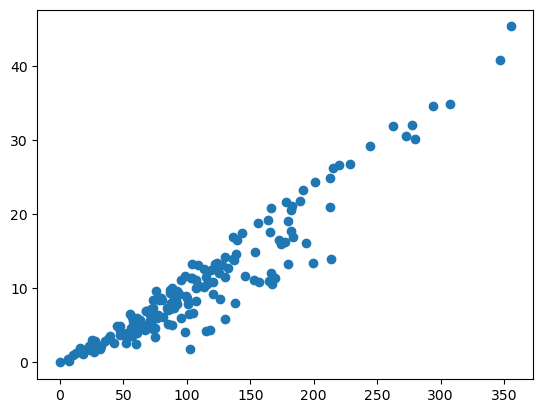

In [138]:
X_tot = []

print(len(growth_matrix.iloc[:,0]))

print(growth_matrix.sum(axis=1, numeric_only=True))
growth_sum = growth_matrix.sum(axis=1, numeric_only=True)
# for x in range(len(growth_matrix.iloc[:,0])):
#     print(growth_matrix.iloc[x,:])
#     print(growth_matrix.iloc[x,1])
    #X_tot.append[np.sum(growth_matrix.iloc[x,:])]

pc1proj = []

for i in range(176):
    #print(growth_matrix.iloc[i])
    pc1proj.append(np.dot(growth_matrix.iloc[i], pca.components_[0]))

plt.scatter(growth_sum, pc1proj)

Question 4.5: (6 pts) Given the results above we will ignore PC1 and go on to PC2.  In the original dataset that you imported in step 1 there is a column which is called "sugar-acid-preference" go back to the paper and figure what this "SAP" is referring to exactly.  What is it? (2 pts). Next make a scatterplot of SAP against the projection of the data onto the **second** PC (PC2).  What is PC2 describing about microbial traits in the dataset?

They use SAP "to quantify the degree to which an organism is able to consume more sugars than acids (or vice versa)", using a formula that takes the difference between average growth on sugars and average growth on acids and divides by their sum. PC2 seems to describe vageuly the microbial trait of its metabolic preference for acids vs sugars.

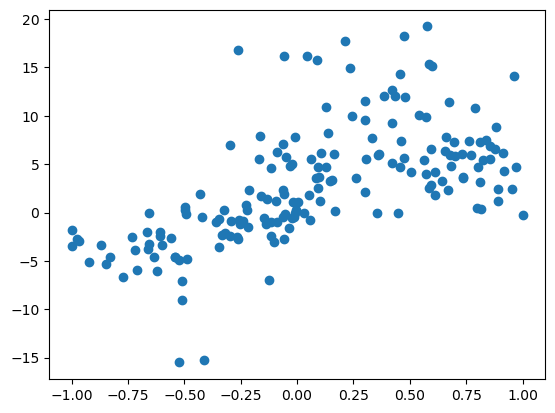

In [139]:
pc2proj = []
for i in range(176):
    #print(growth_matrix.iloc[i])
    pc2proj.append(np.dot(growth_matrix.iloc[i], pca.components_[1]))

df_raw['sugar-acid-preference (averaged over 3 experiments, -1=acids, +1=sugars)']
plt.scatter(df_raw['sugar-acid-preference (averaged over 3 experiments, -1=acids, +1=sugars)'], pc2proj)

Question 4.6:(4 pts) Now we have some idea of what PC2 is describing about the data. The next question is whether we can interpret the **loadings** on this PC -- remember from lecture that these loadings are the entries in the principal component vector.  First, what is the length of each PC and what do the loadings correspond to strains or carbon sources? 

Each PC will have a length of 1, and the loadings correspond to carbon sources.

In [119]:
np.linalg.norm(pca.components_[0])

0.9999999999999996

Question 4.7: (6 pts) Given your answers to 4.5 and 4.6 what do you **expect** of the loadings on PC2?  What types of entries do you expect to be large and positive and what entries do you expect to be large and negative?

Since a positive SAP means with a higher preference for sugar, and PC2 is postively correlated with SAP, then we would expect the loadings to reflect a preference for sugars over acdis, meaning high positive values for sugars, and large negative loadings for acid carbon sources.

Question 4.8: (6 pts) make a bar plot of the loadings on PC2. Choose a reasonable threshold to define large positive and large negative loadings (remember, these are entries on PCs).  What **types** of resources have large positive or large negative loadings on PC2?

A large fraction of the large positive values, or above 0.15 end in -ose, indicating sugars have large positive loadings. Loadings above 0.15 not ending with -ose were usually polysaccarides like starch or pullulan, which could be lumped in with the rest of the simple sugars. Most of the large negative values, or below -0.08 ended with -ate, indicating they were organic acids.

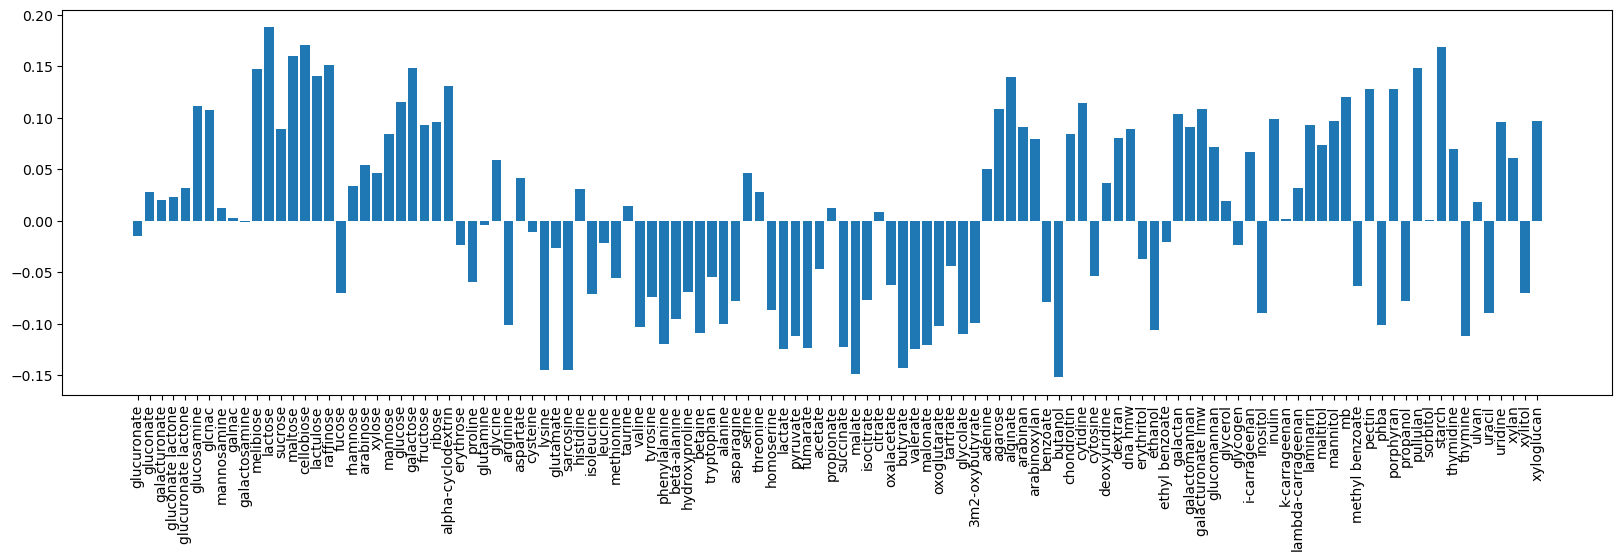

In [120]:
pca.components_[1]
index = [0]

bars = pd.DataFrame(data=np.reshape(pca.components_[1], (1,118)),columns = ['glucuronate', 'gluconate', 'galacturonate', 'gluconate lactone',
 'glucuronate lactone' ,'glucosamine', 'glcnac', 'mannosamine', 'galnac',
 'galactosamine', 'melibiose', 'lactose', 'sucrose', 'maltose' ,'cellobiose',
 'lactulose', 'raffinose' ,'fucose', 'rhamnose', 'arabinose', 'xylose',
 'mannose', 'glucose', 'galactose', 'fructose', 'ribose', 'alpha-cyclodextrin',
 'erythrose', 'proline', 'glutamine' ,'glycine' ,'arginine' ,'aspartate',
 'cysteine' ,'lysine' ,'glutamate', 'sarcosine', 'histidine' ,'isoleucine',
 'leucine' ,'methionine', 'taurine', 'valine' ,'tyrosine' ,'phenylalanine',
 'beta-alanine', 'hydroxyproline', 'betaine', 'tryptophan' ,'alanine',
 'asparagine' ,'serine', 'threonine', 'homoserine', 'lactate', 'pyruvate',
 'fumarate', 'acetate', 'propionate', 'succinate', 'malate', 'isocitrate',
 'citrate', 'oxalacetate', 'butyrate', 'valerate', 'malonate', 'oxoglutarate',
 'tartrate', 'glycolate', '3m2-oxybutyrate', 'adenine', 'agarose', 'alginate',
 'arabinan', 'arabinoxylan', 'benzoate', 'butanol', 'chondroitin', 'cytidine',
 'cytosine', 'deoxyuridine', 'dextran', 'dna hmw', 'erythritol', 'ethanol',
 'ethyl benzoate', 'galactan', 'galactomannan', 'galacturonate lmw',
 'glucomannan', 'glycerol', 'glycogen', 'i-carrageenan', 'inositol', 'inulin',
 'k-carrageenan', 'lambda-carrageenan', 'laminarin', 'maltitol', 'mannitol',
 'mb', 'methyl benzoate', 'pectin', 'phba', 'porphyran', 'propanol', 'pullulan',
 'sorbitol', 'starch', 'thymidine', 'thymine', 'ulvan', 'uracil', 'uridine',
 'xylan', 'xylitol', 'xyloglucan'], index = index)

plt.figure(figsize=(20, 5))
plt.bar(bars.columns, bars.iloc[0,:])
plt.xticks(rotation=90);

Question 4.9: (4 pts) Make a scatterplot of the data in PC2 and PC3 space.  That is, project the data onto PC2 and then on to PC3 and make a scatterplot of the results.  This should look like Fig.1C in the paper, does it?  (it won't be exactly matching)

The scatterplot does not match very well, also it does have a distinguished cluster in the upper left corner.

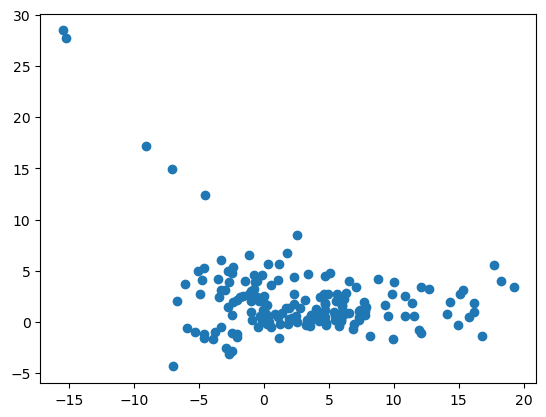

In [141]:
pc3proj = []

for i in range(176):
    #print(growth_matrix.iloc[i])
    pc3proj.append(np.dot(growth_matrix.iloc[i], pca.components_[2]))

#plt.scatter(pc1proj, pc2proj)
plt.scatter(pc2proj, pc3proj)

**EXTRA CREDIT** (5 pts) We did not examime PC3 in the data, looking at the loadings of PC3 what metabolic strategies is PC3 describing?

A metabolic strategy around amino acids, since most of the loadings with either higher positive or high negative values are those that are amino acids themselves, or participate in the metabolic pathway of an amino acid.

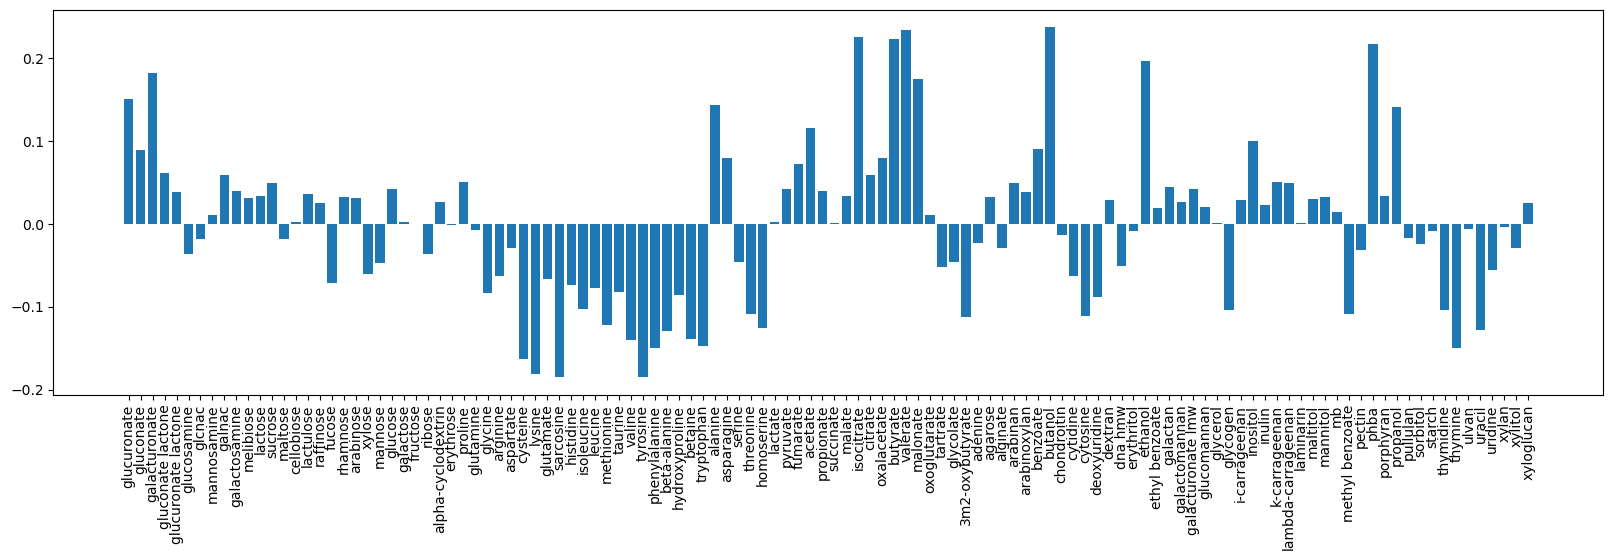

In [124]:
pca.components_[1]
index = [0]

bars3 = pd.DataFrame(data=np.reshape(pca.components_[2], (1,118)),columns = ['glucuronate', 'gluconate', 'galacturonate', 'gluconate lactone',
 'glucuronate lactone' ,'glucosamine', 'glcnac', 'mannosamine', 'galnac',
 'galactosamine', 'melibiose', 'lactose', 'sucrose', 'maltose' ,'cellobiose',
 'lactulose', 'raffinose' ,'fucose', 'rhamnose', 'arabinose', 'xylose',
 'mannose', 'glucose', 'galactose', 'fructose', 'ribose', 'alpha-cyclodextrin',
 'erythrose', 'proline', 'glutamine' ,'glycine' ,'arginine' ,'aspartate',
 'cysteine' ,'lysine' ,'glutamate', 'sarcosine', 'histidine' ,'isoleucine',
 'leucine' ,'methionine', 'taurine', 'valine' ,'tyrosine' ,'phenylalanine',
 'beta-alanine', 'hydroxyproline', 'betaine', 'tryptophan' ,'alanine',
 'asparagine' ,'serine', 'threonine', 'homoserine', 'lactate', 'pyruvate',
 'fumarate', 'acetate', 'propionate', 'succinate', 'malate', 'isocitrate',
 'citrate', 'oxalacetate', 'butyrate', 'valerate', 'malonate', 'oxoglutarate',
 'tartrate', 'glycolate', '3m2-oxybutyrate', 'adenine', 'agarose', 'alginate',
 'arabinan', 'arabinoxylan', 'benzoate', 'butanol', 'chondroitin', 'cytidine',
 'cytosine', 'deoxyuridine', 'dextran', 'dna hmw', 'erythritol', 'ethanol',
 'ethyl benzoate', 'galactan', 'galactomannan', 'galacturonate lmw',
 'glucomannan', 'glycerol', 'glycogen', 'i-carrageenan', 'inositol', 'inulin',
 'k-carrageenan', 'lambda-carrageenan', 'laminarin', 'maltitol', 'mannitol',
 'mb', 'methyl benzoate', 'pectin', 'phba', 'porphyran', 'propanol', 'pullulan',
 'sorbitol', 'starch', 'thymidine', 'thymine', 'ulvan', 'uracil', 'uridine',
 'xylan', 'xylitol', 'xyloglucan'], index = index)

plt.figure(figsize=(20, 5))
plt.bar(bars3.columns, bars3.iloc[0,:])
plt.xticks(rotation=90);

**EXTRA CREDIT** (5 pts) What transformation could you apply to the X matrix (data matrix) BEFORE doing PCA that would remove the issue with the first PC that you discivered above?  If you do this transformation what does the first PC now correspond to in the data?

Scale each row so that total growth = 1, therefore each entry for a given sample is the % contribution to total growth instead of some absolute number. Once you do this, the first PC will now correspond to sugar-acid preference.